In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
sns.set()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

import keras
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tensorflow.python import debug as tf_debug
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
import import_ipynb


Using TensorFlow backend.


importing Jupyter notebook from Helpers.ipynb


In [3]:

#sns.pairplot(df1,y_vars=["SalePrice"], x_vars=df1.columns, hue="SaleCondition")

,KitchenAbvGr,TotRmsAbvGrd,EnclosedPorch,3SsnPorch,MiscVal,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,age_YearBuilt,age_YearRemodAdd,age_YrSold,log_LotArea,log_MasVnrArea,log_BsmtFinSF1,log_BsmtFinSF2,log_BsmtUnfSF,log_TotalBsmtSF,log_1stFlrSF,log_2ndFlrSF,log_LowQualFinSF,log_GrLivArea,log_GarageArea,log_WoodDeckSF,log_OpenPorchSF,log_ScreenPorch,

In [5]:
#df1.hist(figsize=(40,40))

In [6]:
corr=df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

In [7]:
#f, ax = plt.subplots(figsize=(20, 20))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr, cmap=cmap, vmax=1, center=0, xticklabels=True, yticklabels=True,
#            linewidths=.5, cbar_kws={"shrink": 1})

In [8]:
#sns.pairplot(df1,y_vars=["SalePrice"], x_vars=df1.columns)


In [9]:
y = df1['SalePrice']
# X = df[['LotArea']]

X = df1.drop('SalePrice', axis=1)


In [10]:

# define model
model = Sequential()
input_layer = Dense(256, input_dim=len(X.columns), activation='relu', kernel_initializer='normal') 
model.add(input_layer)
model.add(Dense(256, activation='relu', kernel_initializer='normal') )

model.add(Dense(1, activation='linear'))

optimizer = keras.optimizers.Adam() #Adam(lr=0.0015);
# compile model
model.compile(loss='mean_squared_logarithmic_error', optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Restoring model weights from the end of the best epoch
Epoch 00192: early stopping
Train: 0.007, Test: 0.025


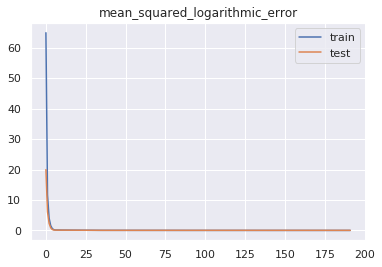

In [11]:


trainX, testX, trainy, testy = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler.fit(trainX)
trainX= scaler.transform(trainX)
testX= scaler.transform(testX)
# fit model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=30, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
tb_callback =keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')
history = model.fit(trainX, trainy, validation_data=(testX, testy), 
                    epochs=3000, verbose=0, batch_size=32, callbacks=[early_stop, tb_callback])
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('mean_squared_logarithmic_error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
# pyplot.plot(history.history['acc'], label='train_acc')
# pyplot.plot(history.history['val_acc'], label='test_acc')
pyplot.legend()
pyplot.show()

In [12]:
print(input_layer.get_weights())


[array([[-0.06423909, -0.00806441,  0.09064084, ...,  0.11295698,
         0.08483792,  0.09385234],
       [-0.02627149,  0.14277105,  0.05404662, ...,  0.05122109,
         0.08477518,  0.04539113],
       [-0.06066103,  0.04946861, -0.0102491 , ...,  0.02216575,
         0.01108722,  0.04753343],
       ...,
       [ 0.02951003, -0.08873932,  0.07516833, ..., -0.03844365,
         0.08556125,  0.04659406],
       [ 0.04107839,  0.09142446,  0.14315577, ..., -0.02762465,
         0.00724681,  0.04853968],
       [ 0.03479788, -0.06864692,  0.06335277, ...,  0.02874216,
         0.01429349,  0.09340921]], dtype=float32), array([ 0.02996253,  0.03429346,  0.0389189 ,  0.03908972,  0.0406704 ,
        0.05372517,  0.03815903,  0.04009548,  0.06010405,  0.03704129,
        0.0361145 ,  0.03919391,  0.05747576,  0.05526823, -0.0092597 ,
        0.03656399,  0.05640716,  0.04176275, -0.01018171,  0.03990645,
        0.04567263,  0.0359323 ,  0.06279334,  0.04166964, -0.00925117,
        0.

In [13]:
df2.describe()

,KitchenAbvGr,TotRmsAbvGrd,EnclosedPorch,3SsnPorch,MiscVal,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PoolQC_Ex,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,age_YearBuilt,age_YearRemodAdd,age_YrSold,log_LotArea,log_MasVnrArea,log_BsmtFinSF1,log_BsmtFinSF2,log_BsmtUnfSF,log_TotalBsmtSF,log_1stFlrSF,log_2ndFlrSF,log_LowQualFinSF,log_GrLivArea,log_GarageArea,log_WoodDeckSF,log_OpenPorchSF,log_ScreenPorch,log_PoolArea
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000

In [14]:
dfX=scaler.transform(df2[X.columns])

KeyError: "['Exterior2nd_Other', 'GarageQual_Ex', 'MiscFeature_TenC', 'Exterior1st_Stone', 'PoolQC_Fa', 'HouseStyle_2.5Fin', 'Exterior1st_ImStucc'] not in index"

In [ ]:
result = model.predict(dfX)

In [ ]:
dfR = pd.DataFrame(df2_ids)
dfR['SalePrice']=result

In [ ]:
dfR.describe()

In [ ]:
dfR.head()

In [ ]:
dfR.to_csv('predictions.csv',index = None, header=True)

In [ ]:
df5 = pd.read_csv('test.csv')



In [ ]:
predicted = model.predict(X)

In [ ]:
df1['PredictedPrice']=predicted
df1['Delta'] = df1['SalePrice']-df1['PredictedPrice']


In [ ]:
corr=df1.corr()['Delta']
corr=corr[np.abs(corr)>0.35] 
corr=corr.drop(['Delta', 'PredictedPrice'])
print(corr.index)
plt.scatter( corr,corr.index)
# f, ax = plt.subplots(figsize=(40, 40))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr, cmap=cmap, vmax=1, center=0, xticklabels=True, yticklabels=True,
#             linewidths=.5, cbar_kws={"shrink": 1})

In [ ]:
w = input_layer.get_weights()

In [ ]:
w[1]

In [ ]:
len(w[0])

In [ ]:
weights = pd.DataFrame(w[0])
weights.insert(loc=0, column='feature', value=X.columns)
weights.set_index('feature', inplace=True)
                     


In [ ]:
weights.columns

In [ ]:
 wt = weights.transpose()

In [ ]:
wt.describe()